# Modeling pH Curved

## Titration of HCl in Water

Let us consider the tiration of a strong acid in water using a solution of a stron base as the titrant. The usual example is an unknown HCl solution titrated by an NaOH solution of known concentration.

I add 10 mL of 1.2 M HCl to enough water to create a total volume of 100 mL. We can easily calculate how many mL of a 0.100 M solution of NaOH are required to reach the endpoint. But what does the titration look like if I chose to plot pH vs. volume NaOH added?

## The Initial pH

Neutral water has a pH value of 7. Adding the HCl will increase the concentration of hydronium ion. The new pH can be calculated as in the code below. The moles of titrant needed to return to pH 7 will be equal to the moles of acid added. 

In [13]:
import numpy as np
from matplotlib import pyplot as plt



######################
## Define values
######################

conc_HCl_stock_solution = 1.2 # moles/L
volume_HCl_aliquote = 10 # mL
total_volume_sample = 100 # mL
initial_pH_value = 7

## convert values to standard SI units

volume_HCl_aliquote = volume_HCl_aliquote * 1/1000  # 1L/1000mL
total_volume_sample = total_volume_sample * 1/1000  # 1L/1000mL

#######################
## Calculate concentration and pH of sample
#######################

initial_conc_H = 10 ** -initial_pH_value  ## convert pH to [H]
initial_moles_H_in_neutral_sample = initial_conc_H * total_volume_sample

moles_HCl_added = volume_HCl_aliquote * conc_HCl_stock_solution

final_moles_H_in_sample = initial_moles_H_in_neutral_sample + moles_HCl_added

concentration_of_H_in_sample = final_moles_H_in_sample / total_volume_sample
pH_sample_initial = -np.log10(concentration_of_H_in_sample)

#######################
## Print out values for inspection
#######################

print(f"The moles of H+ in 100 mL of neutral water is {initial_moles_H_in_neutral_sample:0.10f} moles")
print(f"The moles of H+ in 10 mL of HCl aliquote is {moles_HCl_added:0.3f} moles")
print(f"The total moles of H+ in 100 mL of sample is {final_moles_H_in_sample:0.10f} moles")
print("Maybe we can ignore the initial H+ in neutral water when adding acid?")
print()
print(f"Concentration of H+ in sample is {concentration_of_H_in_sample:0.4f} moles/L")
print(f"Initial pH of sample is {pH_sample_initial:0.4f}")

The moles of H+ in 100 mL of neutral water is 0.0000000100 moles
The moles of H+ in 10 mL of HCl aliquote is 0.012 moles
The total moles of H+ in 100 mL of sample is 0.0120000100 moles
Maybe we can ignore the initial H+ in neutral water when adding acid?

Concentration of H+ in sample is 0.1200 moles/L
Initial pH of sample is 0.9208


## Adding Titrant

It is easier to calculate the titrant that must be added to change the pH to a given value compared to the pH after a set amount of titrant is added.

The total amount of base added to a system ($B_T$) will be the total of the free hydroxide concentration ($OH^-$) and the change in concentration of the deprotonated acid ($A$). We can say that...

$$ B_T = OH^- + A $$

The free concentration of hydroxide gives us the observed concentration of hydronium ion (and thus we would have the pH) by using the water product, $K_W$.

$$K_W = H^+ \cdot OH^-$$

In the case of a strong acid the amount of the basic form is equal to the amount of acid added. HCl completely dissociates to hydronium and chloride ion. So we can say that the amount of conjugate base present will always be equal to the amount of strong acid added. We can state that 

$$ HCl_t = HCl + Cl^- $$

where $HCl_t$ is the concentration of acid added.

We will now combine these equation to state an equation where we can calculate the amount of base that is added to reach a given value of hydronium ion concentration as we titrate a strong acid.

Bt = measured OH + OH needed to titrate acid

$$ B_T = \frac{K_W}{H^+} + (HCl_0 - H^+) $$

Thoughts

$$ H^+ = HCl - OH_{added} $$
$$ B_T = OH^- + A $$
$$ H^+ = HCl_0 - OH_{added}



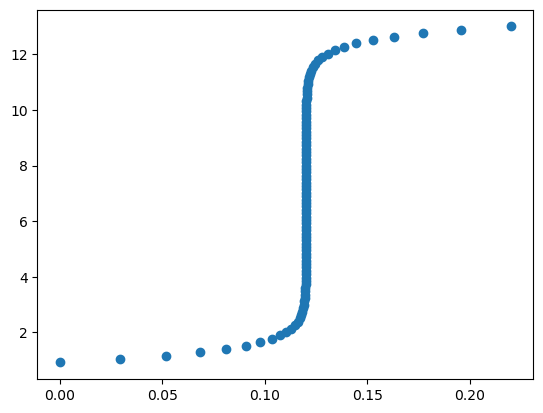

In [26]:
pH = 0.9208  ## The initial pH of our sample as determined above
Kw = 1E-14

pH_list = np.linspace(pH, 13, 100)   # a list of 100 pH values starting at initial pH
H_list = 10**(-pH_list)              # a list of [H] values calculted from the pH list

Init_H = 10**-pH                     # the amount of HCl added defined the pH 

Bt = Kw/H_list + (Init_H - H_list)

y=pH_list
x=Bt
plt.plot(x,y,"o")

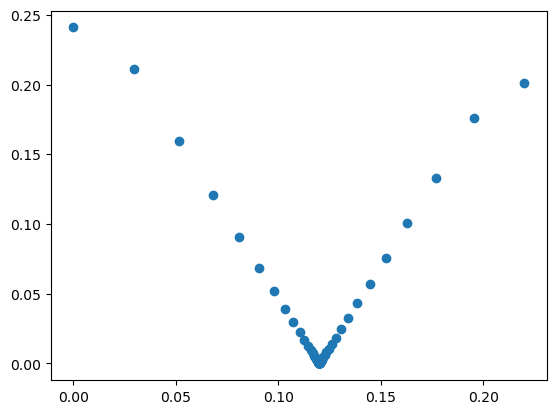

In [37]:
pH = 0.9208  ## The initial pH of our sample as determined above
Kw = 1E-14

pH_list = np.linspace(pH, 13, 100)   # a list of 100 pH values starting at initial pH
H_list = 10**(-pH_list)              # a list of [H] values calculted from the pH list

Init_H = 10**-pH                     # the amount of HCl added defined the pH 

Bt = Kw/H_list + (Init_H - H_list)


y=pH_list
x=Bt
der = np.gradient( x, y )
plt.plot(x,der,"o")

